In [1]:

# Libraries need to to run  if you encounter an error try running pip install <libraryname> in your terminal 

from nltk import *
import wikipedia
import pandas as pd  
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# nltk.download('stopwords')
# nltk.download('punkt')

## Oakland's Wikipedia page most frequent words

In [2]:
# wikipedia library allows for a simple way to access wikipedia data 
oak_wiki = wikipedia.page("Oakland")
oak_wiki

<WikipediaPage 'Oakland, California'>

In [3]:
# returns us the entire text content of the wikipedia page
oak_wiki.content

'Oakland is the largest city and the county seat of Alameda County, California, United States. A major West Coast port city, Oakland is the largest city in the East Bay region of the San Francisco Bay Area, the third largest city overall in the San Francisco Bay Area, the eighth most populated city in California, and the 45th largest city in the United States. With a population of 425,195 as of  2017, it serves as a trade center for the San Francisco Bay Area; its Port of Oakland is the busiest port in the San Francisco Bay, the entirety of Northern California, and the fifth busiest in the United States of America. An act to incorporate the city was passed on May 4, 1852, and incorporation was later approved on March 25, 1854, which officially made Oakland a city. Oakland is a charter city.Oakland\'s territory covers what was once a mosaic of California coastal terrace prairie, oak woodland, and north coastal scrub. Its land served as a rich resource when its hillside oak and redwood t

In [4]:
# tokenize or convert text data into a more useful form for this analysis 
oakland_tokens = word_tokenize(oak_wiki.content.lower()) # also converting the corpus of words into lower case

# removing punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)

no_punc_oakland_tokens = [w.translate(table) for w in oakland_tokens]

# remove remaining tokens that are not alphabetic
no_number_punc_oakland_tokens = [word for word in no_punc_oakland_tokens if word.isalpha()]


# filtering out stop words words such as the, is , etc 
from nltk.corpus import stopwords
stopset = set(stopwords.words('english'))

oakland_words = [w for w in no_number_punc_oakland_tokens if not w in stopset]




print(oakland_words[:100]) # prints out 100 of the words in the Oakland wikipedia article

['oakland', 'largest', 'city', 'county', 'seat', 'alameda', 'county', 'california', 'united', 'states', 'major', 'west', 'coast', 'port', 'city', 'oakland', 'largest', 'city', 'east', 'bay', 'region', 'san', 'francisco', 'bay', 'area', 'third', 'largest', 'city', 'overall', 'san', 'francisco', 'bay', 'area', 'eighth', 'populated', 'city', 'california', 'largest', 'city', 'united', 'states', 'population', 'serves', 'trade', 'center', 'san', 'francisco', 'bay', 'area', 'port', 'oakland', 'busiest', 'port', 'san', 'francisco', 'bay', 'entirety', 'northern', 'california', 'fifth', 'busiest', 'united', 'states', 'america', 'act', 'incorporate', 'city', 'passed', 'may', 'incorporation', 'later', 'approved', 'march', 'officially', 'made', 'oakland', 'city', 'oakland', 'charter', 'cityoakland', 'territory', 'covers', 'mosaic', 'california', 'coastal', 'terrace', 'prairie', 'oak', 'woodland', 'north', 'coastal', 'scrub', 'land', 'served', 'rich', 'resource', 'hillside', 'oak', 'redwood', 'timbe

In [5]:
# returns the most common 50 words and the amount of times used in the Oakland wiki article 

total_oakland_words = len(oakland_words) # len is a function returning the length of a list

print("Total Words in Oakland word list is",total_oakland_words,"\n")
print("List of the 50 most common words in our Oakland Wikipedia article" )
FreqDist(oakland_words).most_common(50)

Total Words in Oakland word list is 5612 

List of the 50 most common words in our Oakland Wikipedia article


[('oakland', 292),
 ('city', 90),
 ('san', 56),
 ('bay', 43),
 ('francisco', 37),
 ('east', 33),
 ('california', 31),
 ('area', 31),
 ('cities', 31),
 ('downtown', 27),
 ('district', 25),
 ('school', 24),
 ('united', 23),
 ('states', 22),
 ('population', 21),
 ('one', 21),
 ('high', 21),
 ('us', 21),
 ('also', 20),
 ('schools', 19),
 ('largest', 18),
 ('major', 18),
 ('center', 18),
 ('years', 18),
 ('people', 18),
 ('first', 18),
 ('county', 16),
 ('west', 16),
 ('port', 16),
 ('many', 16),
 ('china', 16),
 ('state', 15),
 ('new', 15),
 ('international', 15),
 ('hills', 15),
 ('crime', 15),
 ('american', 15),
 ('park', 15),
 ('alameda', 14),
 ('including', 14),
 ('police', 14),
 ('among', 13),
 ('several', 13),
 ('square', 13),
 ('ranked', 13),
 ('berkeley', 12),
 ('transit', 12),
 ('service', 12),
 ('include', 12),
 ('freeway', 12)]

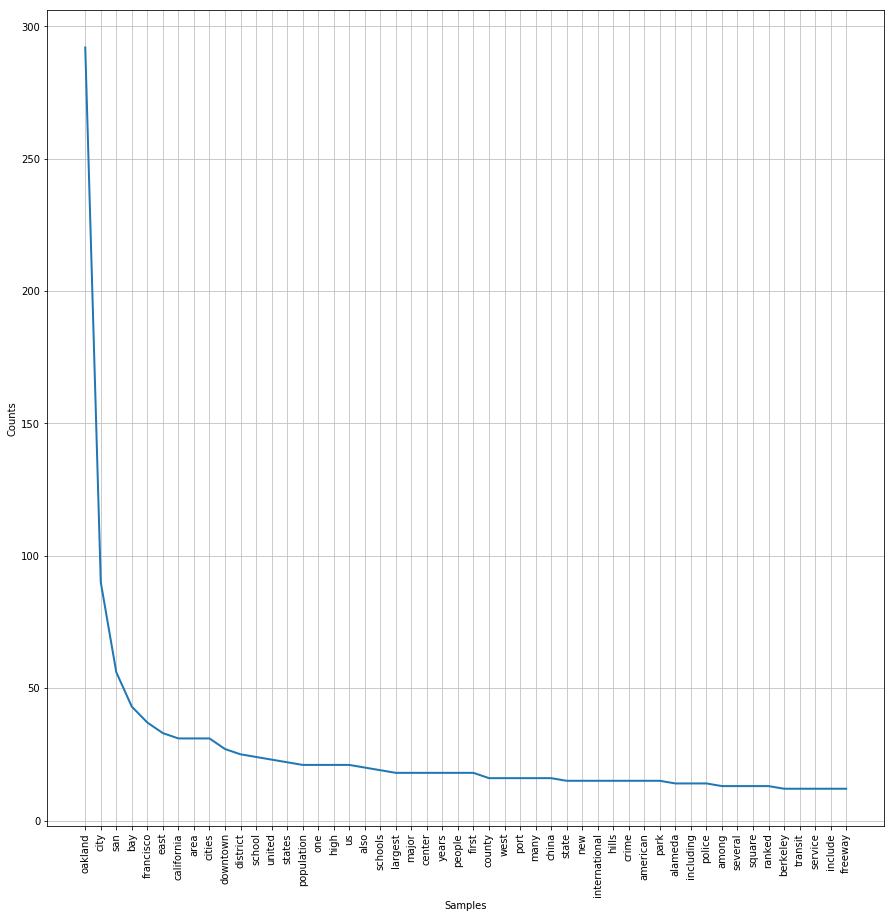

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15)) 

FreqDist(oakland_words).plot(
    50,)

In [7]:
Text(oakland_words).concordance("crime")

Displaying 15 of 15 matches:
st largescale operation kind violent crime property crime increased period oakl
peration kind violent crime property crime increased period oakland murder rate
ular resulted elevated rates violent crime causing oakland consistently listed 
ty elected officials known democrats crime substantial progress made reducing c
made reducing city historically high crime rate gun crime primarily concentrate
ity historically high crime rate gun crime primarily concentrated certain poor 
rly homicides committed guns oakland crime rate begun escalate late end drug wa
 new york city primary factor rising crime rate dramatic increase street narcot
 rate dropped four years row violent crime general dropped increases categories
ntinued decreases various categories crime including homicides decline homicide
assaults rapes declined lowest level crime eight years crime statistics release
lined lowest level crime eight years crime statistics released year oakland pol
fety increa

In [8]:
bigrams = ngrams(oakland_words,2)

In [9]:
FreqDist(bigrams).most_common(50)

[(('san', 'francisco'), 37),
 (('united', 'states'), 20),
 (('east', 'bay'), 16),
 (('bay', 'area'), 15),
 (('francisco', 'bay'), 13),
 (('downtown', 'oakland'), 12),
 (('port', 'oakland'), 9),
 (('lake', 'merritt'), 9),
 (('east', 'oakland'), 9),
 (('oakland', 'oakland'), 9),
 (('high', 'school'), 9),
 (('city', 'oakland'), 8),
 (('international', 'airport'), 8),
 (('west', 'oakland'), 8),
 (('alameda', 'county'), 7),
 (('oakland', 'city'), 7),
 (('oakland', 'also'), 7),
 (('san', 'jose'), 7),
 (('oakland', 'ranked'), 7),
 (('league', 'oakland'), 7),
 (('oakland', 'international'), 6),
 (('oakland', 'hills'), 6),
 (('inches', 'mm'), 6),
 (('jack', 'london'), 6),
 (('london', 'square'), 6),
 (('super', 'bowl'), 6),
 (('city', 'council'), 6),
 (('west', 'coast'), 5),
 (('ac', 'transit'), 5),
 (('rotary', 'club'), 5),
 (('violent', 'crime'), 5),
 (('bay', 'bridge'), 5),
 (('cities', 'oakland'), 5),
 (('high', 'schools'), 5),
 (('medical', 'center'), 5),
 (('largest', 'city'), 4),
 (('nor

In [52]:
# looking at the context that surrounds francisco
Text(oakland_words).concordance("francisco")

Displaying 25 of 25 matches:
d largest city east bay region san francisco bay area third largest city overal
rea third largest city overall san francisco bay area eighth populated city cal
population serves trade center san francisco bay area port oakland busiest port
area port oakland busiest port san francisco bay entirety northern california f
ak redwood timber logged build san francisco oakland fertile flatland soils hel
continental railroad following san francisco earthquake many san francisco citi
 san francisco earthquake many san francisco citizens moved oakland enlarging c
t temescal creek stream enters san francisco bay emeryville area later became o
loping land becoming expensive san francisco chinese struggling financially res
a often diseases plague spread san francisco even though chinese thoroughly ins
nspected diseases upon arrival san francisco city beginnings three carpentier e
doubled refugees made homeless san francisco earthquake fire lawyer former mine
oakland mur

## San Francisco's Wikipedia page most frequent words

In [11]:
sf_wiki = wikipedia.page("San Francisco")
# tokenize or convert text data into a more useful form for this analysis 
sf_tokens = word_tokenize(sf_wiki.content.lower()) # also converting the corpus of words into lower case

# removing punctuation from each word
import string
table = str.maketrans('', '', string.punctuation)

no_punc_sf_tokens = [w.translate(table) for w in sf_tokens]

# remove remaining tokens that are not alphabetic
no_number_punc_sf_tokens = [word for word in no_punc_sf_tokens if word.isalpha()]


# filtering out stop words words such as the, is , etc 
from nltk.corpus import stopwords
stopset = set(stopwords.words('english'))

sf_words = [w for w in no_number_punc_sf_tokens if not w in stopset]




print(sf_words[:100]) # prints out 100 of the words in the Oakland wikipedia article

['san', 'francisco', 'sf', 'spanish', 'sam', 'fɾanˈsisko', 'spanish', 'saint', 'francis', 'officially', 'city', 'county', 'san', 'francisco', 'cultural', 'commercial', 'financial', 'center', 'northern', 'california', 'san', 'francisco', 'populous', 'city', 'united', 'states', 'fourthmost', 'populous', 'california', 'residents', 'covers', 'area', 'square', 'miles', 'mostly', 'north', 'end', 'san', 'francisco', 'peninsula', 'san', 'francisco', 'bay', 'area', 'making', 'secondmost', 'densely', 'populated', 'large', 'us', 'city', 'fifthmost', 'densely', 'populated', 'us', 'county', 'behind', 'four', 'five', 'new', 'york', 'city', 'boroughs', 'san', 'francisco', 'also', 'part', 'fifthmost', 'populous', 'primary', 'statistical', 'area', 'united', 'states', 'san', 'ca', 'combined', 'statistical', 'area', 'million', 'residents', 'seventhhighest', 'income', 'county', 'united', 'states', 'per', 'capita', 'personal', 'income', 'meaning', 'average', 'san', 'francisco', 'household', 'earned', 'san'

In [12]:
FreqDist(sf_words).most_common(50)

[('san', 304),
 ('francisco', 281),
 ('city', 173),
 ('california', 54),
 ('bay', 51),
 ('area', 46),
 ('population', 40),
 ('united', 36),
 ('also', 33),
 ('states', 30),
 ('park', 30),
 ('district', 29),
 ('us', 27),
 ('north', 25),
 ('new', 25),
 ('golden', 25),
 ('gate', 24),
 ('many', 24),
 ('county', 23),
 ('center', 23),
 ('mission', 23),
 ('first', 23),
 ('neighborhoods', 23),
 ('large', 22),
 ('since', 22),
 ('major', 21),
 ('university', 21),
 ('street', 21),
 ('south', 21),
 ('high', 21),
 ('largest', 20),
 ('pacific', 20),
 ('including', 19),
 ('america', 19),
 ('west', 18),
 ('public', 18),
 ('world', 17),
 ('people', 17),
 ('neighborhood', 17),
 ('national', 17),
 ('located', 17),
 ('one', 17),
 ('residents', 16),
 ('became', 16),
 ('state', 16),
 ('american', 16),
 ('system', 16),
 ('hill', 16),
 ('cities', 16),
 ('highest', 15)]

## Comparing Distinctive words between SF and Oakland by difference of proportions

In [13]:
# converts our words into vectors and counts 
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer()

In [14]:
# making a list of a list of the words for SF's and Oakland's wikipage 
text_list = []
text_list.append(sf_wiki.content)
text_list.append(oak_wiki.content)


In [15]:
# I convert our list of words into a csv with the 0th row being SF and the 1st row being oakland
#  each column contains the number of times that word appears
cities_df = pd.DataFrame(countvec.fit_transform(text_list).toarray(), columns=countvec.get_feature_names())
cities_df

,00,000,009,01,017,02,031,040,06,06631,...,zebra,zephyr,zeppelin,zip,zipcar,zone,zoned,zoo,zoopraxiscope,zoot
0,0,32,0,1,1,0,1,0,2,1,...,1,0,1,0,1,1,0,1,1,0
1,2,8,1,0,0,1,0,1,0,0,...,0,1,0,1,0,0,1,1,0,1


In [16]:
# I add across rows to get the total word count per row 
cities_df['word_count'] = cities_df.sum(axis = 1)

In [17]:
# I divide each column by its corresponding total word count to get frequencies
cities_df = cities_df.iloc[:,:].div(cities_df.word_count, axis=0)
cities_df

,00,000,009,01,017,02,031,040,06,06631,...,zephyr,zeppelin,zip,zipcar,zone,zoned,zoo,zoopraxiscope,zoot,word_count
0,0.000000,0.002586,0.000000,0.000081,0.000081,0.000000,0.000081,0.000000,0.000162,0.000081,...,0.000000,0.000081,0.000000,0.000081,0.000081,0.000000,0.000081,0.000081,0.000000,1.0
1,0.000212,0.000846,0.000106,0.000000,0.000000,0.000106,0.000000,0.000106,0.000000,0.000000,...,0.000106,0.000000,0.000106,0.000000,0.000000,0.000106,0.000106,0.000000,0.000106,1.0


In [18]:
# I then create a row of difference in proprtions of words allowing us to see the most distinctive words between SF and Oakland  
cities_df.loc[2] = cities_df.loc[0] - cities_df.loc[1]
cities_df

,00,000,009,01,017,02,031,040,06,06631,...,zephyr,zeppelin,zip,zipcar,zone,zoned,zoo,zoopraxiscope,zoot,word_count
0,0.000000,0.002586,0.000000,0.000081,0.000081,0.000000,0.000081,0.000000,0.000162,0.000081,...,0.000000,0.000081,0.000000,0.000081,0.000081,0.000000,0.000081,0.000081,0.000000,1.0
1,0.000212,0.000846,0.000106,0.000000,0.000000,0.000106,0.000000,0.000106,0.000000,0.000000,...,0.000106,0.000000,0.000106,0.000000,0.000000,0.000106,0.000106,0.000000,0.000106,1.0
2,-0.000212,0.001740,-0.000106,0.000081,0.000081,-0.000106,0.000081,-0.000106,0.000162,0.000081,...,-0.000106,0.000081,-0.000106,0.000081,0.000081,-0.000106,-0.000025,0.000081,-0.000106,0.0


In [19]:
# words with positive values are more distinct to SF's wiki page
# while words with negative values are moredistinct to Oakland's wiki page 
cities_df.loc[2].sort_values(ascending=False)

san           0.019779
francisco     0.019370
the           0.015139
of            0.008330
city          0.004738
is            0.003949
than          0.002094
mission       0.001859
gate          0.001834
golden        0.001809
000           0.001740
on            0.001434
located       0.001349
for           0.001234
more          0.001205
hill          0.001187
as            0.001145
california    0.001142
popular       0.001131
population    0.001093
university    0.001063
market        0.001051
since         0.001038
with          0.001016
america       0.000982
978           0.000970
isbn          0.000970
north         0.000963
museum        0.000945
south         0.000932
                ...   
church       -0.000952
plan         -0.000977
council      -0.000977
black        -0.000977
by           -0.000987
census       -0.001002
police       -0.001076
schools      -0.001120
had          -0.001139
they         -0.001157
merritt      -0.001163
hills        -0.001182
port       

In [20]:
# this time I take care to remove numbers along with stop words and repeat the process I did above
countvec_cities = CountVectorizer(preprocessor=lambda x: re.sub(r'(\d[\d\.])+', '', x.lower()),stop_words="english") 
# countvec_cities  = CountVectorizer(stop_words="english")

#same as code above
cities_df_sw = pd.DataFrame(countvec_cities.fit_transform(text_list).toarray(), columns=countvec_cities.get_feature_names())
cities_df_sw['word_count'] = cities_df_sw.sum(axis=1)
cities_df_sw = cities_df_sw.iloc[:,0:].div(cities_df_sw.word_count, axis=0)
cities_df_sw.loc[2] = cities_df_sw.loc[0] - cities_df_sw.loc[1]
cities_df_sw.loc[2].sort_values(axis=0, ascending=False)

san              0.034760
francisco        0.034035
city             0.008358
mission          0.003265
gate             0.003221
golden           0.003178
located          0.002370
hill             0.002086
california       0.002019
popular          0.001987
population       0.001928
university       0.001869
market           0.001845
america          0.001727
isbn             0.001703
north            0.001695
museum           0.001660
south            0.001640
neighborhoods    0.001597
oclc             0.001561
class            0.001561
park             0.001479
island           0.001475
financial        0.001475
valley           0.001431
gay              0.001419
local            0.001333
economy          0.001289
ucsf             0.001278
presidio         0.001278
                   ...   
ranked          -0.001416
elected         -0.001427
age             -0.001427
served          -0.001483
kaiser          -0.001483
general         -0.001526
lake            -0.001613
years       

## Words Clouds

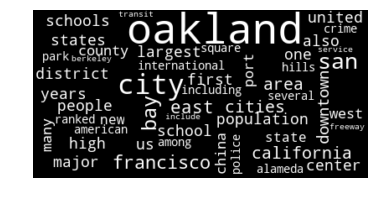

In [75]:
wordcloud_oak_wiki = WordCloud(max_font_size=50, max_words=50, background_color="black", color_func=lambda *args, **kwargs: "white").generate_from_frequencies(FreqDist(oakland_words))
plt.figure()
plt.imshow(wordcloud_oak_wiki, interpolation="bilinear")
plt.axis("off")
plt.show()
wordcloud_oak_wiki.to_file("oakland_wiki_wordcloud.png")

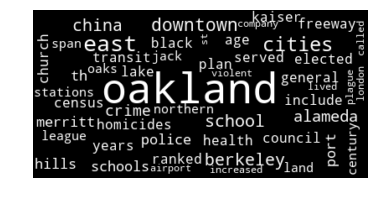

In [76]:
oak_vs_sf_wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black",color_func=lambda *args, **kwargs: "white").generate_from_frequencies(abs(cities_df_sw.loc[2].sort_values(axis=0, ascending=True)[:50]
                                                                                                ))
plt.figure()
plt.imshow(oak_vs_sf_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
oak_vs_sf_wordcloud.to_file("oakland_wiki_diff_sf_prop_wordcloud.png")